# Pytanic - Exploring the Titanic through Python

Hello and Welcome to my Guide to predict the survivability of the famous Kaggle competition.

The Basic Stages of the notebook are as follows:
1. Objective
2. Data Understanding
3. Data Preparation
4. Model Building
  * 4a. Instantiate
  * 4b. Fit
  * 4c. Predict
  * 4d. Score
5. Results/Model Evaluation

> ## Objective
To Predict the Survivability of travellers on the RMS Titanic. The dataset is broken into training and test datasets. We need to use the `train` dataset and apply ML techniques to predict the Survived variable `(0=Did not Survive ; 1=Survived)` on the `test` data.
Things to Check:
* Q> Are Females more prone to Surviving?
* Q> Are kids more prone to surviving?
* Q> Is there any relationship beteen the class of the passenger and surviving?

## 2. Data Understanding

### Load the Data

In [1]:
# Import all the necessary packages. Packages loaded later in code as well as and when required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Import the DataSets

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore the Data

In [3]:
# Checking Distributions

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Separating the Vairable Types

display("Categorical Variables", df_train.dtypes[(df_train.dtypes == object)])
display("Continuous Variables", df_train.dtypes[(df_train.dtypes != object)])

'Categorical Variables'

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

'Continuous Variables'

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [5]:
# Show the columns with missing values

df_train.isnull().sum()[(df_train.isnull().sum() > 0)]

Age         177
Cabin       687
Embarked      2
dtype: int64

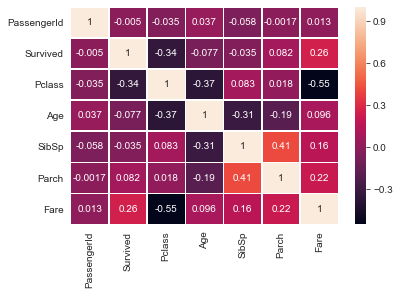

In [6]:
# Check visual correlation plot

#plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5);

> **Notable Features from this correlation plot**
* ***Survived***, the DV has strong -ve correlation with ***Pclass***
* ***Survived*** is positively correlated to ***Fare***
* ***Fare*** and ***Pclass*** are nevatively correlated, which explains the above points
* ***Pclass*** also has a negative correlation with ***Age*** which says that older people preferred 1st class
* ***Age*** is inversely related to ***Sibling/Spouse*** :: Lower aged has more siblings/spouse
* ***Parent/Children*** also has a direct correlation with ***Siblings/Spouse***. Says that they prefer travelling with family.

### Univariate and Bivariate Explorations

#### Exploring Pclass <<

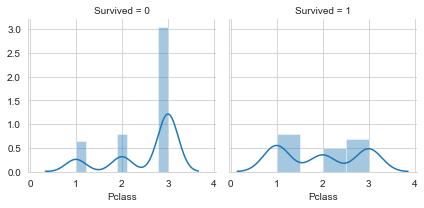

In [26]:
# Survived vs Pclass
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Pclass');

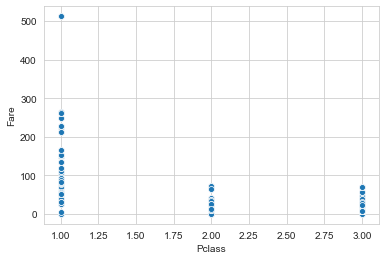

In [7]:
# Pclass vs Fare
sns.scatterplot(x='Pclass',y='Fare',data=df_train,palette='summer');

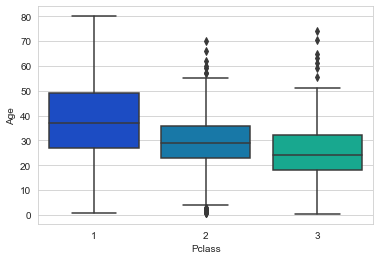

In [15]:
# Pclass vs age
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

#### Exploring Name (featurizing Title) << 

#### Exploring Age

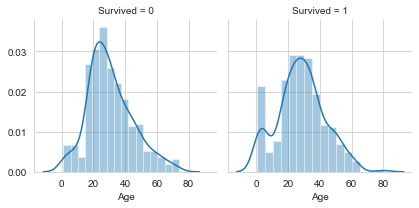

In [22]:
# Survived vs Age
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Age');

#### Exploring Fare

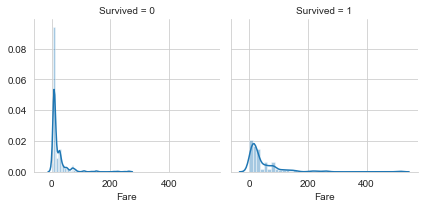

In [25]:
# Survived vs Fare
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Fare');

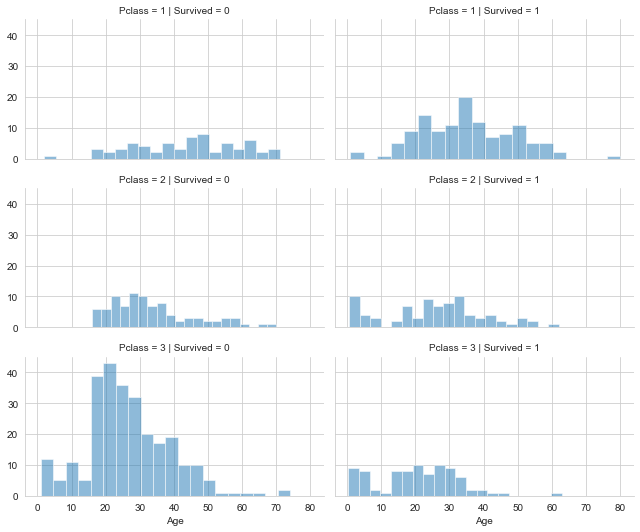

In [27]:
# Survived vs Pclass Distribution
g = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.5, aspect=1.8)
g.map(plt.hist, 'Age', alpha=.5, bins=20);

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


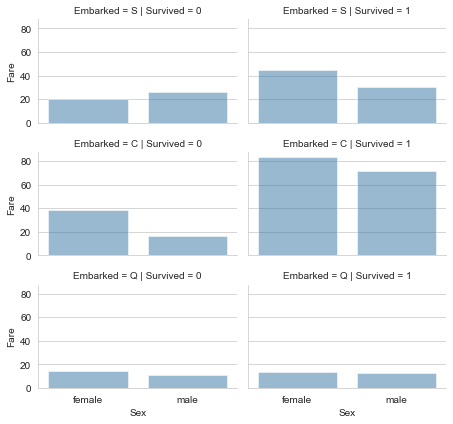

In [28]:
# Survived vs Sex
g = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);

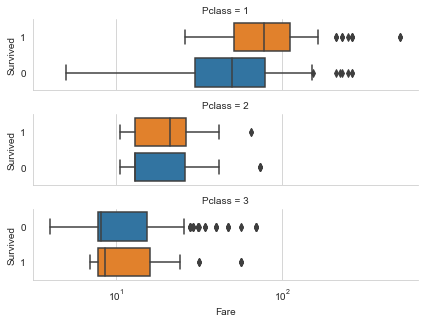

In [29]:
# Survived vs Pclass vs Fare
g = sns.catplot(x="Fare", y="Survived", row="Pclass", kind="box", orient="h", height=1.5, aspect=4, data=df_train.query("Fare > 0"))
g.set(xscale="log");

In [10]:
df_train.Ticketid.value_counts()

               665
PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
SOTON/O.Q.       8
CA.              8
SOTON/OQ         7
A/5.             7
CA               6
STON/O2.         6
S.O.C.           5
C                5
F.C.C.           5
SC/PARIS         5
SC/Paris         4
S.O./P.P.        3
PP               3
A/4.             3
A/4              3
SC/AH            2
SOTON/O2         2
S.C./PARIS       2
A./5.            2
P/PP             2
WE/P             2
A.5.             2
S.C./A.4.        1
W.E.P.           1
SW/PP            1
A/S              1
SCO/W            1
W/C              1
A4.              1
S.O.P.           1
F.C.             1
S.W./PP          1
C.A./SOTON       1
Fa               1
SO/C             1
SC               1
S.P.             1
SC/AH Basle      1
Name: Ticketid, dtype: int64

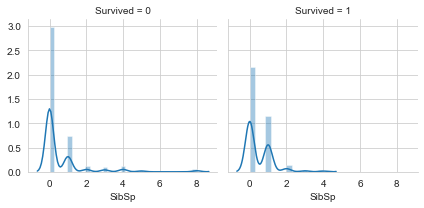

In [30]:
# Survived vs Sibsp
g= sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'SibSp');

In [9]:
# whats with the ticket ?

# df[['Ticketa','Ticketb','Ticketc']] = df.Ticket.str.rsplit(' ', n=2, expand=True)  :: does not work

split_tickets = df_train['Ticket'].str.rsplit(n=1)
prefixes = [sp[0] if len(sp) == 2 else '' for sp in split_tickets]
df_train['Ticketid'] = prefixes
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticketid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,


In [8]:
# Who pays so much?????
# len(df_train[df_train['Fare'] > 200])  #20 people paid >200 :O
df_train[df_train['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


> Key Findings:
* Yes, women are more prone to survival, the graphical plots show the same
* Yes, children are more prone to survival
* Yes, the pclass is differentiator between survival

## 3. Data Preparation

### Cleaning Data

In [31]:
df_train_clean = df_train
df_train_clean.shape

(891, 13)

In [32]:
df_train_clean = df_train_clean[df_train_clean['SibSp'] < 8]
df_train_clean.shape

(884, 13)

In [33]:
df_train_clean = df_train_clean[df_train['Fare'] < 500];
df_train_clean.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(881, 13)

### Merging Test and Train to impute values in both

In [34]:
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticketid
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,


In [35]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Ticketid     418
dtype: int64

In [36]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [37]:
temp=df.loc[(df['Pclass']==3) & (df['Parch']==0) & (df['SibSp']==0) & (df['Fare']>0)].sort_values(by=['Fare'],ascending=False)
temp.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticketid
PassengerId,,,,,,,,,,,,
839,1.0,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,
644,1.0,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,
170,0.0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,
75,1.0,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,
510,1.0,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,


In [38]:
df['Fare']=df['Fare'].fillna(temp['Fare'].mean())

In [39]:
nullAgeSubset=df.loc[df['Age'].isnull()]
nullAgeSubset.shape

(263, 12)

In [40]:
for index in nullAgeSubset.index:
    ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(df['Embarked']==nullAgeSubset.loc[index]['Embarked'])&(df['Sex']==nullAgeSubset.loc[index]['Sex'])].mean()
    if(ageSubsetMean>0):
        df['Age'].loc[index]=ageSubsetMean
    else:
        ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])&(df['Embarked']==nullAgeSubset.loc[index]['Embarked'])].mean()
        if(ageSubsetMean>0):
            df['Age'].loc[index]=ageSubsetMean
        else:
            ageSubsetMean=df['Age'].loc[(df['Parch']==nullAgeSubset.loc[index]['Parch'])&(df['SibSp']==nullAgeSubset.loc[index]['SibSp'])&(df['Pclass']==nullAgeSubset.loc[index]['Pclass'])].mean()
            if(ageSubsetMean>0):
                df['Age'].loc[index]=ageSubsetMean
            else:
                df['Age'].loc[index]=df['Age'].mean()
                

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Ticketid     418
dtype: int64

In [42]:
df.drop(['Cabin','Name','Ticket'],axis=1, inplace=True)

In [43]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticketid    418
dtype: int64

In [44]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.598648,0.498854,0.385027,33.277052
std,0.486592,0.837836,13.365542,1.041658,0.865560,51.743174
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.425581,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Featurizing / Prepping Data + Standardizing and Breaking into Train/Test

In [45]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Age']=StandardScaler().fit_transform(np.array(df['Age']).reshape(-1,1))
df['Fare']=StandardScaler().fit_transform(np.array(df['Fare']).reshape(-1,1))

In [46]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,1309.000000,1309.000000,1.309000e+03,1309.000000,1309.000000,1.309000e+03,1309.000000
mean,0.383838,2.294882,0.644003,8.345756e-17,0.498854,0.385027,4.478211e-17,1.493506
std,0.486592,0.837836,0.478997,1.000382e+00,1.041658,0.865560,1.000382e+00,0.814244
min,0.000000,1.000000,0.000000,-2.202671e+00,0.000000,0.000000,-6.433654e-01,0.000000
25%,0.000000,2.000000,0.000000,-5.687425e-01,0.000000,0.000000,-4.907112e-01,1.000000
50%,0.000000,3.000000,1.000000,-8.780154e-02,0.000000,0.000000,-3.639136e-01,2.000000
75%,1.000000,3.000000,1.000000,5.165514e-01,1.000000,0.000000,-3.870689e-02,2.000000
max,1.000000,3.000000,1.000000,3.772433e+00,8.000000,9.000000,9.261806e+00,2.000000


In [47]:
df_train_final = df[df.Survived.notnull()]
df_test_final = df[df.Survived.isnull()].drop(['Survived'], axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df_train_final.drop(['Survived'], axis=1),
                                                     df_train_final['Survived'], 
                                                     test_size=0.1,random_state=101)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 8)
(90, 8)
(801,)
(90,)


## 4. Model Building

### Load the Required Libraries

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Fit Model and Predict

In [51]:
model = XGBClassifier (learning_rate=0.001, n_estimators=50, max_depth=8)
model.fit (X_train, y_train)
accuracy_score (y_test, model.predict(X_test))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Ticketid

### Export the final output

In [ ]:
df_test_final['Survived'] = model.predict(df_test_final).astype(int)
df_test_final

In [ ]:
df_test_final[['Survived']].to_csv('output.csv')

## Results and Final Thoughts

Using the XGBoost algorithm yields better results, however, there are theories that simple models yield good results as well. This all depends on the features(variables) selected and tuning the hyperparameters.
I have had better models with Deciscion Tree and Logistic Regression as well in initail cases. Feel free to use your own algorithm and explore. Thats the key in building better models: Exploration !
Happy Coding :)